Tristan Baudoux  
LMAPR1492 - tâche 9  
28/03/22  
Objectifs - Table des matières :

1. Téléchargement de la structure de bande de phonons du matériau qui nous a été attribué : le Na2TlSb.  


2. Calcul de la vitesse du son pour 3 branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin. 




## Imports

In [32]:
from pymatgen import Structure, Lattice, Molecule
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from IPython.display import HTML, display, Image
from matplotlib import pyplot as plt
import numpy as np
from scipy import constants

from pymatgen.phonon.plotter import PhononBSPlotter #Essentiel pour cette tâche ! 


## 1. Téléchargement de la structure de bande de phonons du matériau qui nous a été attribué : le Na2TlSb.  


Dans cette tâche, nous allons utiliser le module suivant : pymatgen.phonon.plotter. Et plus spécifiquement la classe PhononBSPlotter. 

Ci-dessous des liens utiles dont le code source permettant de comprendre au mieux son utilisation :

- https://pymatgen.org/pymatgen.phonon.plotter.html
- https://github.com/materialsproject/pymatgen/blob/v2022.3.22/pymatgen/phonon/plotter.py#L242-L502


Comme pour la tâche précédente, nous pouvons vérifier que la structure de bande que l'on produit est bien correcte en comparant avec MaterialsProject.

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



Structure de bandes de phonons du Na2TlSb : 


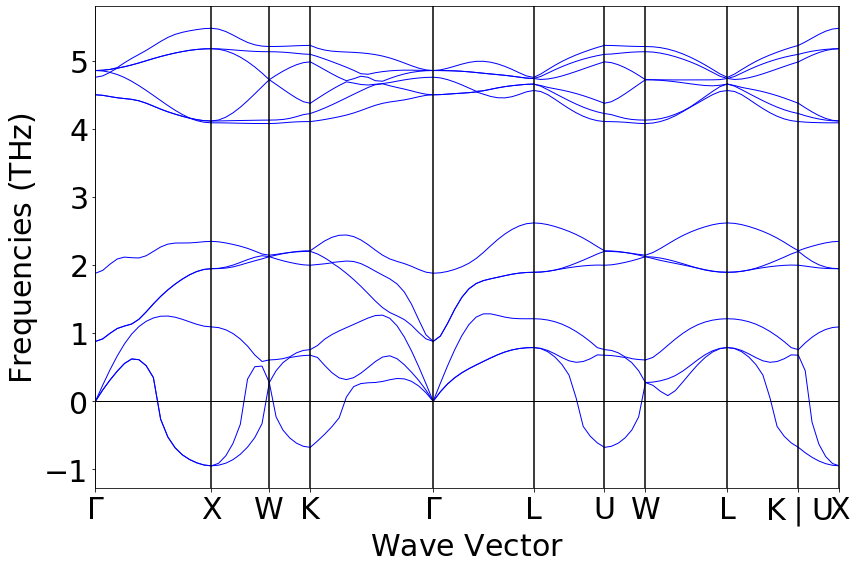

In [33]:
with MPRester("DX9Ul1PoZnBi6AJt") as m:

    # Structure de bande de phonons sur base de notre id de matériau : 
    structure = m.get_structure_by_material_id("mp-866132")
    PhononBandStruct = m.get_phonon_bandstructure_by_material_id("mp-866132")

# Et pour afficher la structure de bandes de phonons :
print("Structure de bandes de phonons du Na2TlSb : ")

bsPlot = PhononBSPlotter(PhononBandStruct)
bsPlot.show()

Ci-dessous, nous affichons les distances entre les différents points de la zone de Brillouin. 

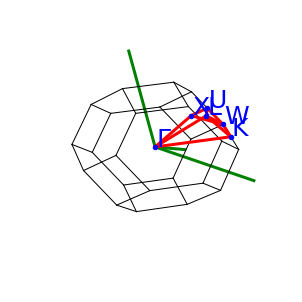

Γ  :  0.0
___________________________
X  :  0.8398807393816533
___________________________
X  :  0.8398807393816533
___________________________
W  :  1.25982110907248
___________________________
W  :  1.25982110907248
___________________________
K  :  1.5567637921748494
___________________________
K  :  1.5567637921748494
___________________________
Γ  :  2.447591841481956
___________________________
Γ  :  2.447591841481956
___________________________
L  :  3.1749498979357273
___________________________
L  :  3.1749498979357273
___________________________
U  :  3.6892697120048545
___________________________
U  :  3.6892697120048545
___________________________
W  :  3.9862123951072235
___________________________
W  :  3.9862123951072235
___________________________
L  :  4.580097761311963
___________________________
L  :  4.580097761311963
___________________________
K$\mid$U  :  5.094417575381092
___________________________
X  :  5.391360258483459
___________________________


In [34]:
plot = PhononBSPlotter(PhononBandStruct)
plot.plot_brillouin()


data = plot.bs_plot_data()
ticks = data.get("ticks")
distance = ticks.get("distance")
distances = data.get("distances")
label = ticks.get("label")
frequency = data.get("frequency")
lattice = data.get("lattice")

for i in range(len(distance)):
    if ticks.get("label")[i] == "$\Gamma$" :
        ticks.get("label")[i] = "\u0393"
    print(label[i], " : ", distance[i])
    print("___________________________")

## 2. Calcul de la vitesse du son pour 3 branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin. 


Comme précisé sur la page wikipédia suivante : https://fr.wikipedia.org/wiki/Phonon#:~:text=La%20vitesse%20de%20propagation%20d,%E2%88%82%CF%89k%2F%E2%88%82k. 

La vitesse de propagation d'un phonon dans le réseau correspond à la vitesse de propagation du son dans un solide. Celle-ci est donnée par la pente de la relation de dispersion : $\partial \omega / \partial k$. De plus, pour de faibles valeurs de k, càd de grandes longueurs d'onde, la relation de dispersion est presque linéaire et la vitesse du son est alors proche d' $\omega$. Faisons donc ici l'approximation de linéarité entre la pulsation du phonon et son vecteur d'onde et approximons dès lors la vitesse du son par une constante. 


### 2.1. Direction $\Gamma$ - X

Commençons par afficher la structure de bande de phonons, la branche acoustique choisie, la pente de l'approximation linéaire ainsi que la vitesse du son. 

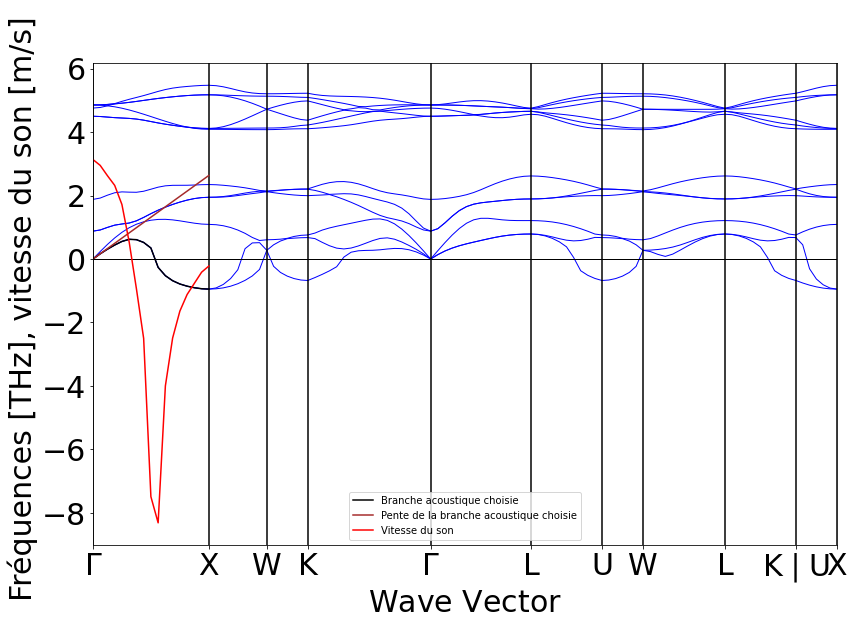

In [35]:
k_distances = distances[0]
frequency1 = frequency[0][1]
derivative = np.gradient(frequency1, k_distances[1]-k_distances[0])
slope_sound = np.add(np.multiply(k_distances, derivative[0]), np.add(- np.multiply(k_distances[0], derivative[0]), frequency1[0]))
approx_sound = (slope_sound[-1]-slope_sound[0])/(k_distances[-1]-k_distances[0])

plot.get_plot()
plt.plot(k_distances, frequency1, color="black", label="Branche acoustique choisie")
plt.plot(k_distances, slope_sound, color="brown", label="Pente de la branche acoustique choisie")
plt.plot(k_distances, derivative, color="red", label="Vitesse du son")
plt.ylabel("Fréquences [THz], vitesse du son [m/s] ")
plt.legend()
plt.show()


In [36]:
print("Vitesse du son MAX : ", np.max(derivative), "[m/s]", " (en k =", k_distances[np.argmax(derivative)], ")")
print("Vitesse du son MIN : ", np.min(derivative), "[m/s]", " (en k =", k_distances[np.argmin(derivative)], ")")
print("Approximation de la vitesse du son par une approximation linéaire (k petits) : ", approx_sound, "[m/s]")

Vitesse du son MAX :  3.1356997784810607 [m/s]  (en k = 0.0 )
Vitesse du son MIN :  -8.315107693898963 [m/s]  (en k = 0.47243291590218 )
Approximation de la vitesse du son par une approximation linéaire (k petits) :  3.1356997784810607 [m/s]


La courbe rouge ci-dessus nous indique la vitesse du son en chaque point de la branche acoustique choisie. Nous pouvons observer que la vitesse atteint son maximum en k = 0 (càd $\Gamma$) et vaut 3.14 m/s. La vitesse est minimum en k = 0.47 et vaut alors -8.32 m/s. 

### 2.2. Direction K-$\Gamma$

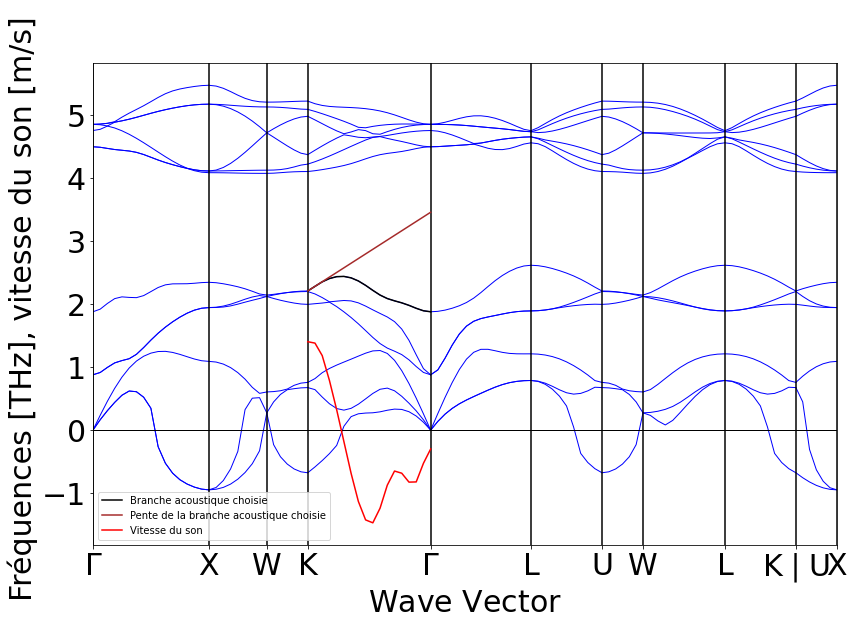

In [37]:
k_distances = distances[3]
frequency2 = frequency[3][5]
derivative = np.gradient(frequency2, k_distances[1]-k_distances[0])
slope_sound = np.add(np.multiply(k_distances, derivative[0]), np.add(- np.multiply(k_distances[0], derivative[0]), frequency2[0]))
approx_sound = (slope_sound[-1]-slope_sound[0])/(k_distances[-1]-k_distances[0])

plot.get_plot()
plt.plot(k_distances, frequency2, color="black", label="Branche acoustique choisie")
plt.plot(k_distances, slope_sound, color="brown", label="Pente de la branche acoustique choisie")
plt.plot(k_distances, derivative, color="red", label="Vitesse du son")
plt.ylabel("Fréquences [THz], vitesse du son [m/s] ")
plt.legend()
plt.show()

In [38]:
print("Vitesse du son MAX : ", np.max(derivative), "[m/s]", " (en k =", k_distances[np.argmax(derivative)], ")")
print("Vitesse du son MIN : ", np.min(derivative), "[m/s]", " (en k =", k_distances[np.argmin(derivative)], ")")
print("Approximation de la vitesse du son par une approximation linéaire (k petits) : ", approx_sound, "[m/s]")

Vitesse du son MAX :  1.403739018372134 [m/s]  (en k = 1.5567637921748494 )
Vitesse du son MIN :  -1.4721952337410131 [m/s]  (en k = 2.02837864177309 )
Approximation de la vitesse du son par une approximation linéaire (k petits) :  1.4037390183721339 [m/s]


La courbe rouge ci-dessus nous indique la vitesse du son en chaque point de la branche acoustique choisie. Nous pouvons observer que la vitesse atteint son maximum en k = 1.56 et vaut 1.4 m/s. La vitesse est minimum en k = 2.03 et vaut alors -1.47 m/s. 

### 2.3. Direction $\Gamma$-L

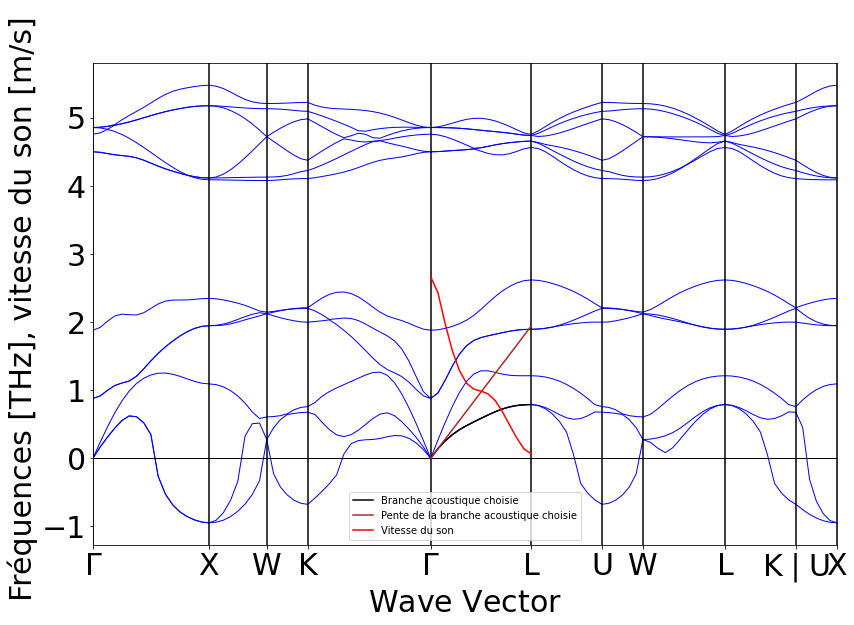

In [39]:
k_distances = distances[4]
frequency3 = frequency[4][1]
derivative = np.gradient(frequency3, k_distances[1]-k_distances[0])
slope_sound = np.add(np.multiply(k_distances, derivative[0]), np.add(- np.multiply(k_distances[0], derivative[0]), frequency3[0]))
approx_sound = (slope_sound[-1]-slope_sound[0])/(k_distances[-1]-k_distances[0])

plot.get_plot()
plt.plot(k_distances, frequency3, color="black", label="Branche acoustique choisie")
plt.plot(k_distances, slope_sound, color="brown", label="Pente de la branche acoustique choisie")
plt.plot(k_distances, derivative, color="red", label="Vitesse du son")
plt.ylabel("Fréquences [THz], vitesse du son [m/s] ")
plt.legend()
plt.show()

In [40]:
print("Vitesse du son MAX : ", np.max(derivative), "[m/s]", " (en k =", k_distances[np.argmax(derivative)], ")")
print("Vitesse du son MIN : ", np.min(derivative), "[m/s]", " (en k =", k_distances[np.argmin(derivative)], ")")
print("Approximation de la vitesse du son par une approximation linéaire (k petits) : ", approx_sound, "[m/s]")

Vitesse du son MAX :  2.6623466073571516 [m/s]  (en k = 2.447591841481956 )
Vitesse du son MIN :  0.06549743614117538 [m/s]  (en k = 3.1749498979357273 )
Approximation de la vitesse du son par une approximation linéaire (k petits) :  2.6623466073571516 [m/s]


La courbe rouge ci-dessus nous indique la vitesse du son en chaque point de la branche acoustique choisie. Nous pouvons observer que la vitesse atteint son maximum en k = 3.59 et vaut 0.95 m/s. La vitesse est minimum en k = 3.33 et vaut alors -1.02 m/s. 